In [33]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

In [54]:
df = pd.read_csv("C:/Users/david/Downloads/dataset_thyroid_sick.csv")
df.head(2)

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,negative


In [55]:
df.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'referral_source',
       'Class'],
      dtype='object')

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on_thyroxine               3772 non-null   object
 3   query_on_thyroxine         3772 non-null   object
 4   on_antithyroid_medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid_surgery            3772 non-null   object
 8   I131_treatment             3772 non-null   object
 9   query_hypothyroid          3772 non-null   object
 10  query_hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

In [57]:
df.replace("?", np.nan, inplace=True)


C:\Users\david\AppData\Local\Temp\ipykernel_26904\2316591250.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace("?", np.nan, inplace=True)


In [58]:
df.isnull().sum()

age                             1
sex                           150
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
sick                            0
pregnant                        0
thyroid_surgery                 0
I131_treatment                  0
query_hypothyroid               0
query_hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH_measured                    0
TSH                           369
T3_measured                     0
T3                            769
TT4_measured                    0
TT4                           231
T4U_measured                    0
T4U                           387
FTI_measured                    0
FTI                           385
TBG_measured                    0
TBG                          3772
referral_source                 0
Class         

In [59]:
df.isna().any()

age                           True
sex                           True
on_thyroxine                 False
query_on_thyroxine           False
on_antithyroid_medication    False
sick                         False
pregnant                     False
thyroid_surgery              False
I131_treatment               False
query_hypothyroid            False
query_hyperthyroid           False
lithium                      False
goitre                       False
tumor                        False
hypopituitary                False
psych                        False
TSH_measured                 False
TSH                           True
T3_measured                  False
T3                            True
TT4_measured                 False
TT4                           True
T4U_measured                 False
T4U                           True
FTI_measured                 False
FTI                           True
TBG_measured                 False
TBG                           True
referral_source     

In [60]:
df['age'] = pd.to_numeric(df['age'], errors='coerce').astype('Int64')
df['TT4'] = pd.to_numeric(df['TT4'], errors='coerce')
df['FTI'] = pd.to_numeric(df['FTI'], errors='coerce')
df['T4U'] = pd.to_numeric(df['T4U'], errors='coerce')
df['T3'] = pd.to_numeric(df['T3'], errors='coerce')
df['TSH'] = pd.to_numeric(df['TSH'], errors='coerce')



In [61]:
df["TBG"]

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
3767   NaN
3768   NaN
3769   NaN
3770   NaN
3771   NaN
Name: TBG, Length: 3772, dtype: float64

In [62]:
df.drop(columns=["TBG"], inplace=True)


In [63]:
df.head(5)

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,...,2.5,t,125.0,t,1.14,t,109.0,f,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,...,2.0,t,102.0,f,NaN,f,NaN,f,other,negative
2,46,M,f,f,f,f,f,f,f,f,...,NaN,t,109.0,t,0.91,t,120.0,f,other,negative
3,70,F,t,f,f,f,f,f,f,f,...,1.9,t,175.0,f,NaN,f,NaN,f,other,negative
4,70,F,f,f,f,f,f,f,f,f,...,1.2,t,61.0,t,0.87,t,70.0,f,SVI,negative


In [64]:
x = df[(df["sex"] == "M") & (df["pregnant"] == "T")]

In [16]:
x

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,referral_source,Class


In [65]:


# 1️ Rellenar sex con "F" si pregnant es "T"
df.loc[(df['sex'].isnull()) & (df['pregnant'] == "T"), 'sex'] = "F"

# 2️ Ver cuántos valores nulos quedan después de esa imputación
print("Nulos en 'sex' después de asignar 'F' a embarazadas:", df['sex'].isnull().sum())

# 3️Para el resto de los nulos, usar la moda (valor más frecuente de sex)
# Esto se hace porque no es posible inferir el sexo solo con 'pregnant' = "F"
moda_sex = df['sex'].mode()[0]   # Obtener la moda ("F" o "M")

df['sex'].fillna(moda_sex, inplace=True)

# 4️Comprobamos que ya no hay nulos
print("Nulos en 'sex' después de limpieza completa:", df['sex'].isnull().sum())


Nulos en 'sex' después de asignar 'F' a embarazadas: 150
Nulos en 'sex' después de limpieza completa: 0


C:\Users\david\AppData\Local\Temp\ipykernel_26904\1810970088.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sex'].fillna(moda_sex, inplace=True)


In [66]:
df["T3"]

0       2.5
1       2.0
2       NaN
3       1.9
4       1.2
       ... 
3767    NaN
3768    2.1
3769    1.8
3770    2.0
3771    2.2
Name: T3, Length: 3772, dtype: float64

In [67]:
df["FTI"]

0       109.0
1         NaN
2       120.0
3         NaN
4        70.0
        ...  
3767      NaN
3768    114.0
3769    105.0
3770     87.0
3771     92.0
Name: FTI, Length: 3772, dtype: float64

In [68]:
df["TSH"]

0       1.30
1       4.10
2       0.98
3       0.16
4       0.72
        ... 
3767     NaN
3768    1.00
3769    5.10
3770    0.70
3771    1.00
Name: TSH, Length: 3772, dtype: float64

In [69]:
df.isnull().sum()

age                            1
sex                            0
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
sick                           0
pregnant                       0
thyroid_surgery                0
I131_treatment                 0
query_hypothyroid              0
query_hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH_measured                   0
TSH                          369
T3_measured                    0
T3                           769
TT4_measured                   0
TT4                          231
T4U_measured                   0
T4U                          387
FTI_measured                   0
FTI                          385
TBG_measured                   0
referral_source                0
Class                          0
dtype: int64

In [70]:
columnas = ["T3", "FTI", "TSH", "TT4", "T4U"]

for col in columnas:
    media = df[col].mean()
    df[col].fillna(media, inplace=True)


C:\Users\david\AppData\Local\Temp\ipykernel_26904\2456285461.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(media, inplace=True)


In [71]:
df["age"].fillna(50, inplace=True)


C:\Users\david\AppData\Local\Temp\ipykernel_26904\1216137126.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["age"].fillna(50, inplace=True)


In [72]:
df.isnull().sum()

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
referral_source              0
Class                        0
dtype: int64

In [73]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,...,2.5000,t,125.0,t,1.140,t,109.000000,f,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,...,2.0000,t,102.0,f,0.995,f,110.469649,f,other,negative
2,46,M,f,f,f,f,f,f,f,f,...,2.0135,t,109.0,t,0.910,t,120.000000,f,other,negative
3,70,F,t,f,f,f,f,f,f,f,...,1.9000,t,175.0,f,0.995,f,110.469649,f,other,negative
4,70,F,f,f,f,f,f,f,f,f,...,1.2000,t,61.0,t,0.870,t,70.000000,f,SVI,negative


In [30]:
df.iloc[0]  


age                                41
sex                                 F
on_thyroxine                        f
query_on_thyroxine                  f
on_antithyroid_medication           f
sick                                f
pregnant                            f
thyroid_surgery                     f
I131_treatment                      f
query_hypothyroid                   f
query_hyperthyroid                  f
lithium                             f
goitre                              f
tumor                               f
hypopituitary                       f
psych                               f
TSH_measured                        t
TSH                               1.3
T3_measured                         t
T3                                2.5
TT4_measured                        t
TT4                             125.0
T4U_measured                        t
T4U                              1.14
FTI_measured                        t
FTI                             109.0
TBG_measured

In [74]:
df["referral_source"].value_counts()

referral_source
other    2201
SVI      1034
SVHC      386
STMW      112
SVHD       39
Name: count, dtype: int64

In [75]:
df["sex"] = df["sex"].map({"F": 0, "M": 1})

In [76]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df["age"] = scaler.fit_transform(df[["age"]])

In [77]:
df["Class"].value_counts()

Class
negative    3541
sick         231
Name: count, dtype: int64

In [78]:


# columnas que NO quiero transformar
cols_no_transformar = ['age', 'sex', 'Class', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

# Identifica las columnas a transformar con One-Hot Encoding o mapeo
cols_transformar = [col for col in df.columns if col not in cols_no_transformar]

# Convierte directamente en el df original las columnas tipo 't' y 'f' a 1 y 0
for col in cols_transformar:
    if df[col].isin(['t', 'f']).all():
        df[col] = df[col].map({'t': 1, 'f': 0})

# Aplica One-Hot Encoding a 'referral_source' directamente en df
df = pd.get_dummies(df, columns=['referral_source'], drop_first=False)

# Muestra el resultado
df.head()


,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T4U,FTI_measured,FTI,TBG_measured,Class,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
0,-0.534642,0,0,0,0,0,0,0,0,0,...,1.140,1,109.000000,0,negative,False,True,False,False,False
1,-1.431072,0,0,0,0,0,0,0,0,0,...,0.995,0,110.469649,0,negative,False,False,False,False,True
2,-0.285633,1,0,0,0,0,0,0,0,0,...,0.910,1,120.000000,0,negative,False,False,False,False,True
3,0.909606,0,1,0,0,0,0,0,0,0,...,0.995,0,110.469649,0,negative,False,False,False,False,True
4,0.909606,0,0,0,0,0,0,0,0,0,...,0.870,1,70.000000,0,negative,False,False,False,True,False


In [79]:
df.iloc[0] 

age                         -0.534642
sex                                 0
on_thyroxine                        0
query_on_thyroxine                  0
on_antithyroid_medication           0
sick                                0
pregnant                            0
thyroid_surgery                     0
I131_treatment                      0
query_hypothyroid                   0
query_hyperthyroid                  0
lithium                             0
goitre                              0
tumor                               0
hypopituitary                       0
psych                               0
TSH_measured                        1
TSH                               1.3
T3_measured                         1
T3                                2.5
TT4_measured                        1
TT4                             125.0
T4U_measured                        1
T4U                              1.14
FTI_measured                        1
FTI                             109.0
TBG_measured

In [80]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['TSH', 'T3', 'TT4', 'T4U', 'FTI']] = scaler.fit_transform(df[['TSH', 'T3', 'TT4', 'T4U', 'FTI']])


In [81]:
df.iloc[0]

age                         -0.534642
sex                                 0
on_thyroxine                        0
query_on_thyroxine                  0
on_antithyroid_medication           0
sick                                0
pregnant                            0
thyroid_surgery                     0
I131_treatment                      0
query_hypothyroid                   0
query_hyperthyroid                  0
lithium                             0
goitre                              0
tumor                               0
hypopituitary                       0
psych                               0
TSH_measured                        1
TSH                         -0.162608
T3_measured                         1
T3                           0.659068
TT4_measured                        1
TT4                           0.48361
T4U_measured                        1
T4U                          0.783227
FTI_measured                        1
FTI                         -0.046877
TBG_measured

In [82]:
from sklearn.model_selection import train_test_split

def split_train_val_test(df, target_col="Class", random_state=42):
    """
    Divide un DataFrame en train (60%), validación (20%) y test (20%) 
    conservando la proporción de clases.
    
    Parámetros:
    - df: DataFrame original
    - target_col: Columna objetivo (por defecto 'Class')
    - random_state: Semilla para reproducibilidad

    Retorna:
    - train_set, val_set, test_set
    """
    
    # Primera división: train (60%) y temporal (40%)
    train_set, temp_set = train_test_split(
        df,
        test_size=0.4,
        random_state=random_state,
        shuffle=True,
        stratify=df[target_col]
    )
    
    # Segunda división: validación (20%) y test (20%)
    val_set, test_set = train_test_split(
        temp_set,
        test_size=0.5,
        random_state=random_state,
        shuffle=True,
        stratify=temp_set[target_col]
    )
    
    return train_set, val_set, test_set


In [83]:
# 1️ Dividir los datos en train, val, test
train, val, test = split_train_val_test(df)

In [84]:




# 2️ Separar X (variables predictoras) e y (variable objetivo)

# Para entrenamiento
X_train = train.drop(columns=["Class"])
y_train = train["Class"]

# Para validación
X_val = val.drop(columns=["Class"])
y_val = val["Class"]

# Para test
X_test = test.drop(columns=["Class"])
y_test = test["Class"]

# 3️ Crear el modelo de regresión logística
model = LogisticRegression(max_iter=1000)

# 4️ Entrenar el modelo (aprender los patrones)
model.fit(X_train, y_train)

# 5️ Evaluar el modelo en validación
y_pred_val = model.predict(X_val)

print("Reporte de Validación:")
print(classification_report(y_val, y_pred_val))

# 6️ Evaluar el modelo en test
y_pred_test = model.predict(X_test)

print("Reporte de Test:")
print(classification_report(y_test, y_pred_test))


Reporte de Validación:
              precision    recall  f1-score   support

    negative       0.97      0.99      0.98       708
        sick       0.78      0.54      0.64        46

    accuracy                           0.96       754
   macro avg       0.88      0.77      0.81       754
weighted avg       0.96      0.96      0.96       754

Reporte de Test:
              precision    recall  f1-score   support

    negative       0.97      0.99      0.98       709
        sick       0.84      0.59      0.69        46

    accuracy                           0.97       755
   macro avg       0.91      0.79      0.84       755
weighted avg       0.97      0.97      0.97       755



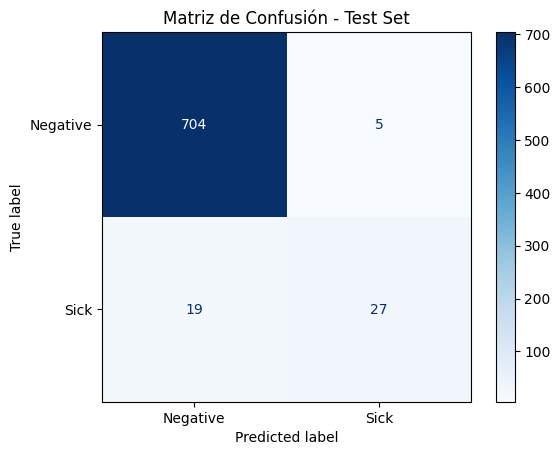

In [87]:
# Predicciones en el set de test
y_pred_test = model.predict(X_test)

# Crear matriz de confusión
cm = confusion_matrix(y_test, y_pred_test)

# Mostrar la matriz de confusión de forma gráfica
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Sick"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión - Test Set")
plt.show()